# Programming Skills Assessment 2
## Part 2 - Performance experiments
By _Miguel Sozinho Ramalho, s2004624_

On the _1st semester, 19/20_

# 1 - Introduction
<!--Short introduction to the rest of the report.-->
The present report performs a performance experiment on the previously developed code for the **percolation** problem. As defined in earlier work, the problem consists of generating a randomly filled grid and then testing if there are paths of empty cells connecting the top of the grid with the bottom of the grid. 

This problem was solved in C and the compiled executable `main.out` (as a result of running the `make` command for the provided `Makefile`) can receive the following parameters:
* `-g` which is the grid size, ie. the number of rows (or columns as it is a square grid) [`default=20`]
* `-s` the value to use for the seed [`default=1564`]
* `-r` the value for `rho` (`[0,1]`) [`default=0.4`]
* `-m` the maximum number of clusters to show, if not present all clusters are displayed
* `-d` the name of the `.dat` file to output the grid to  [`default=map.dat`]
* `-p` the name of the `.pgm` file to output the grid (in a pgm format) to [`default=map.pgm`]

The present report focuses on the performance evolution (measure in terms of execution time of the compiled code) as a function of both the density of filled cells (rho or `-r`) and grid size (`-g`). 

### 1.1 - Report environment
The report is developed as a [Jupyter Notebook](https://jupyter.org/) which is considered to be a more flexible way of explaining the methodology and results achieved while keeping the formality of a report, when compared to traditional static reports. Moreover, the deliverable for this project is a PDF of the notebook, as per the specification, but the original notebook (`performance_report.ipynb`) and the utilities file (`utils.py`) used for the performance execution can be found in the assignment 2 code submission (for Part 1 - testing) under the `performance` folder.

### 1.2 - Structure
In terms of structure, the following sections are:
 * Method: which goes over the process used for compiling, running and measuring the C code.
 * Results: where relevant plots are created and displayed
 * Discussion: where the previous section results are discussed
 * Conclusion: which is dedicated to a reflection process and proposal of future performance experiments ideas

# 2 - Method
<!-- Description of how you carried out your experiment, what your set up was, how you collected data. -->
This section will do a step-by-step explanation of how the experiment was carried out and in what context it was executed.

Reporting Performance

Always important to report details of performance data collection: 
* Machine hardware
* OS
* Third party tools
* Software version
* Technique for collecting data (average, fastest, slowest)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from random import randint
from tqdm.notebook import tqdm
import resource
from utils import *

In [4]:
# compile code to last version
make_project()

In [13]:
grids = list(range(0, 201, 10))
rhos = list(np.linspace(0, 1, 21))

In [14]:
len(grids), len(rhos)

(21, 21)

In [15]:
def execute_and_time(grid, rho, silent=True):
    # define the parameters to use when calling main.out
    params = ["time", "../code/main.out", "-g %d" % grid, "-r %.10f" % rho, "-s %d" % randint(0, 1e4)]
    usage_start = resource.getrusage(resource.RUSAGE_CHILDREN).ru_utime
    custom_subprocess(params, silent)
    return resource.getrusage(resource.RUSAGE_CHILDREN).ru_utime - usage_start

In [16]:
combs = [(i, j, grid, rho) for i, grid in enumerate(grids) for j, rho in enumerate(rhos)]
times = [[0] * len(rhos) for _ in range(len(grids))]
for i,j,g,r in tqdm(combs):
    times[i][j] = execute_and_time(g, r)

# 3 - Results
Your results, including a clear graphical presentation of any performance data. 

Text(0, 0.5, 'grid size')

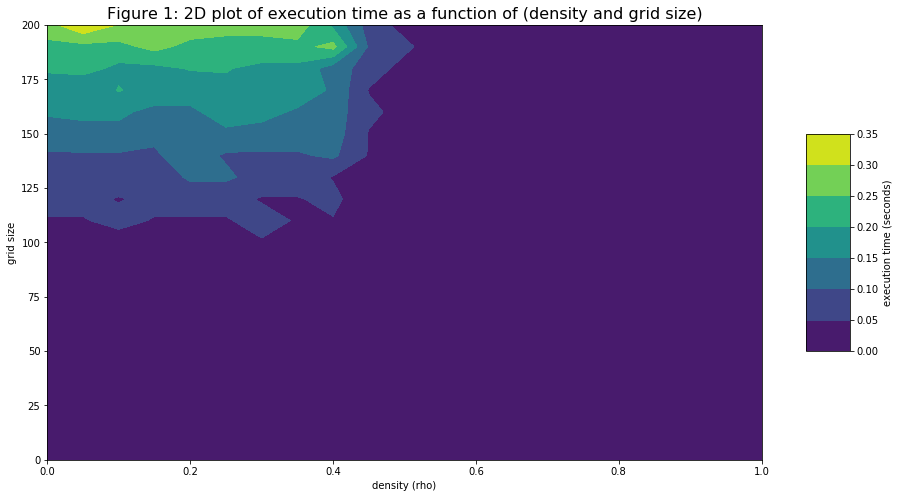

In [93]:
plt.figure(figsize=(16, 8))
plt.title("Figure 1: 2D plot of execution time as a function of (density and grid size)", size=16)
plt.contourf(rhos, grids, times)
cb = plt.colorbar(shrink=0.5, aspect=5)
cb.set_label("execution time (seconds)")
plt.xlabel('density (rho)')
plt.ylabel('grid size')

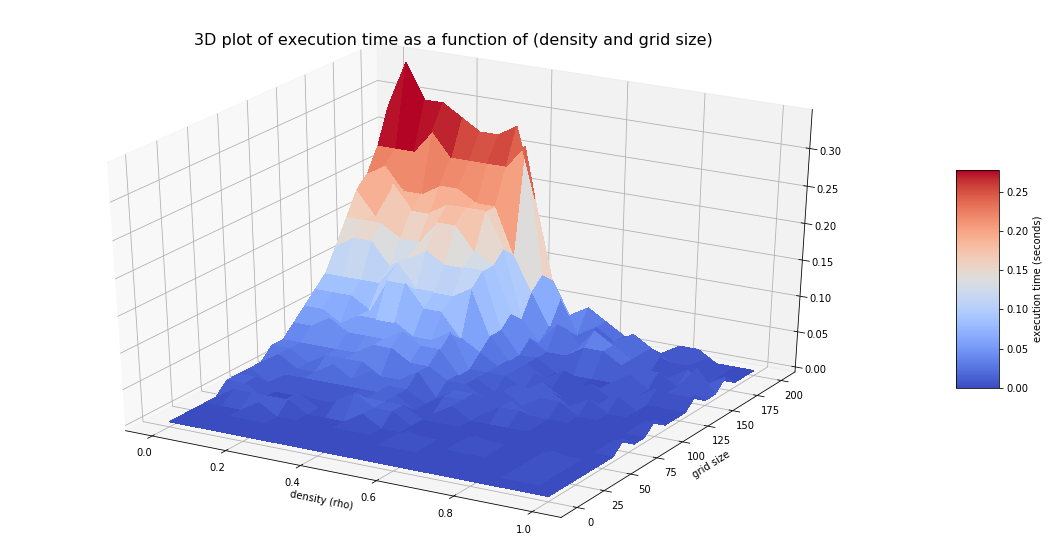

In [89]:
fig = plt.figure(figsize=(20, 10))
ax = fig.gca(projection="3d")
X, Y = np.meshgrid(np.array(rhos), np.array(grids))
Z = np.array(times)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_title("Figure 2: 3D plot of execution time as a function of (density and grid size)", size=16)
cb = fig.colorbar(surf, shrink=0.4, aspect=5)
cb.set_label("execution time (seconds)")
plt.xlabel("density (rho)")
plt.ylabel("grid size");
# ax.view_init(20, -85)

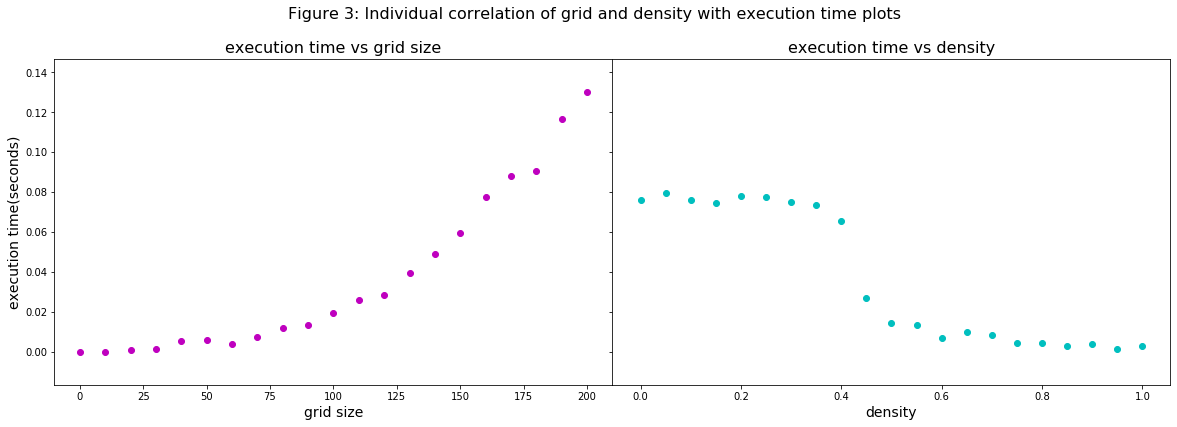

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,6))
fig.subplots_adjust(wspace=0)
# left plot
ax1.scatter(grids, np.mean(times, axis=1), c="m")
ax1.set_ylabel("execution time(seconds)", size=14)
ax1.set_title("execution time vs grid size", size=16)
ax1.set_xlabel("grid size", size=14)
# right plot
ax2.scatter(rhos, np.mean(times, axis=0), c="c")
ax2.set_title("execution time vs density", size=16)
ax2.set_xlabel("density", size=14);
fig.suptitle("Figure 3: Individual correlation of grid and density with execution time plots", fontsize=16, y=1);

# 4 - Discussion
Analysis and discussion of your results.

# 5 - Conclusions
Some brief conclusions and suggestions for future work. 